# Generate Random Graph and Convert to Adjacency Matrix

<font size="2">This code generates a random graph with 1000 nodes and 8000 edges using the gnm_random_graph() function from the NetworkX library in Python. It then converts the graph to an adjacency matrix, where the entry in row i and column j is 1 if there is an edge between nodes i and j, and 0 otherwise. The resulting matrix is then written to a text file called "matrix.txt", with each row of the matrix on a separate line and the entries in each row separated by a single space.</font>

<font size="2">The subject of this code is likely to be related to graph theory and network analysis, specifically the generation of a random graph with a given number of nodes and edges. Random graphs are commonly used in network analysis as a baseline for comparison with real-world networks, to determine whether the observed network properties are statistically significant or whether they can be explained by randomness.</font>

<font size="2">The code also illustrates how to convert a graph to an adjacency matrix, which is a common data structure used in graph algorithms. The resulting matrix can be used to analyze various properties of the graph, such as its connectivity, degree distribution, and centrality measures.</font>

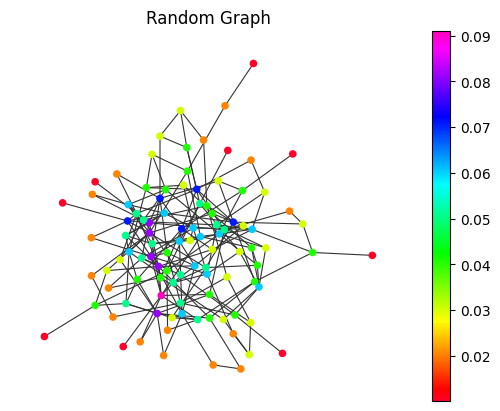

In [106]:
import networkx as nx
import random

N = 100  # 10 nodes
K=4

#L = 400  # 20 edges
L=(K*N)/2


seed = random.randint(1, 100000)  # seed random number generators for reproducibility

G = nx.gnm_random_graph(N, L, seed=seed)# Use seed for reproducibility

matrix = [[0 for j in range(N)] for i in range(N)]
for i in range(0,N):
    connections = G.edges(i)
    # Print each connection
    for connection in connections:
        #print(connection[1])
        matrix[i][connection[1]]=1
with open("matrix.txt", "w") as f:
    # Write each row to the file
    for row in matrix:
        # Convert the numbers to strings and join them into a space-separated string
        row_str = " ".join(str(num) for num in row)
        # Write the row to the file and add a newline character
        f.write(row_str + "\n")
        
import scipy
import matplotlib.pyplot as plt                                       #import matplotlib library
def draw(G, pos, measures, measure_name):
    nodes = nx.draw_networkx_nodes(G, pos, node_size=20,
                                   cmap=plt.cm.gist_rainbow,
                                   node_color=list(measures.values()))
    nx.draw_networkx_labels(G, pos, {})  # exclude labels argument
    edges = nx.draw_networkx_edges(G, pos, width=0.8, edge_color='0.2')
    plt.title(measure_name)
    plt.colorbar(nodes)
    plt.axis('off')
    plt.savefig('plot.png')
    plt.show()

pos = nx.spring_layout(G, seed=675)
draw(G, pos, nx.degree_centrality(G), 'Random Graph')